# Plotting Energy Specturm of Black Body Radiation at Different Temperatures using Python

<font size = 3>Black-body radiation is the thermal electromagnetic radiation within, or surrounding, a body in thermodynamic equilibrium with its environment, emitted by a black body. The spectral formula of black body radiation is given by,</font>
<font size=5>$$B_v(v,T) = \dfrac{2hv^3}{c^2}\dfrac{1}{e^{\frac{hv}{kT}}-1}$$</font>

<font size=3>To automate this formula, we are using <b>astropy</b> library in which we will import model named <b>BlackBody</b> for easy plotting.
If you haven't installed astropy, run the following command in your terminal,</font>

<code>pip install astropy</code>

## Exploring the Model

In [2]:
from astropy.modeling import models
from astropy import units as u

<font size=3>Now we can call our <b>BlackBody()</b> function which has double argument which we need to specify as follows,\
    <b>BlackBody(temperature,scale)</b>
</font>

In [8]:
bb = models.BlackBody(temperature= 500*u.K)
bb

<BlackBody(temperature=500. K, scale=1.)>

<font size=3><b>" u.k "</b> is used to convert the number into kelvin.</font>

<font size=3>Now we can get output from our function.</font>

In [9]:
bb(6000 * u.AA)

<Quantity 2.73038794e-24 erg / (cm2 Hz s sr)>

<font size=3>Since we understood the arguments, let's plot the specturm for a black body using matplotlib, numpy and astropy.</font>

## Plotting Energy Specturm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

<font size=3>I am plotting specturm for a black body for temperature 904 K, 1095 K , 1259 K, 1469 K and 1646 K with wavelength from range 1000 to 11,00,000 Armstrong. You can vary parameters as your wish.
So let's just create an array of temperature which in case of mine are above values. Then create a empty array called flux where we will be adding the values of spectral outcomes for plotting. Following is a combination of simple numpy and python function operation.</font> 

In [33]:
temp = np.array([904,1095,1259,1469,1646])
flux =[]
for i in range (temp.size):
    b_body = models.BlackBody(temperature = temp[i] * u.K)
    wav = np.arange(5000,410000)*u.AA
    flux.append(b_body(wav))

flux

[<Quantity [4.76451203e-17, 4.79205904e-17, 4.81975363e-17, ...,
            1.21535325e-08, 1.21534793e-08, 1.21534262e-08] erg / (cm2 Hz s sr)>,
 <Quantity [1.22845461e-14, 1.23418617e-14, 1.23994201e-14, ...,
            1.52587203e-08, 1.52586521e-08, 1.52585840e-08] erg / (cm2 Hz s sr)>,
 <Quantity [3.76720674e-13, 3.78219348e-13, 3.79723336e-13, ...,
            1.79327448e-08, 1.79326637e-08, 1.79325827e-08] erg / (cm2 Hz s sr)>,
 <Quantity [9.88576035e-12, 9.91860567e-12, 9.95154573e-12, ...,
            2.13632874e-08, 2.13631897e-08, 2.13630919e-08] erg / (cm2 Hz s sr)>,
 <Quantity [8.12487921e-11, 8.14844118e-11, 8.17206104e-11, ...,
            2.42585154e-08, 2.42584036e-08, 2.42582918e-08] erg / (cm2 Hz s sr)>]

<font size=3>Since we got the array of plotting data, ow let's define a function which may helps us to determine the inclination of peak of energy level, which may not be compulsory for plotting, but just for decoration.</font>

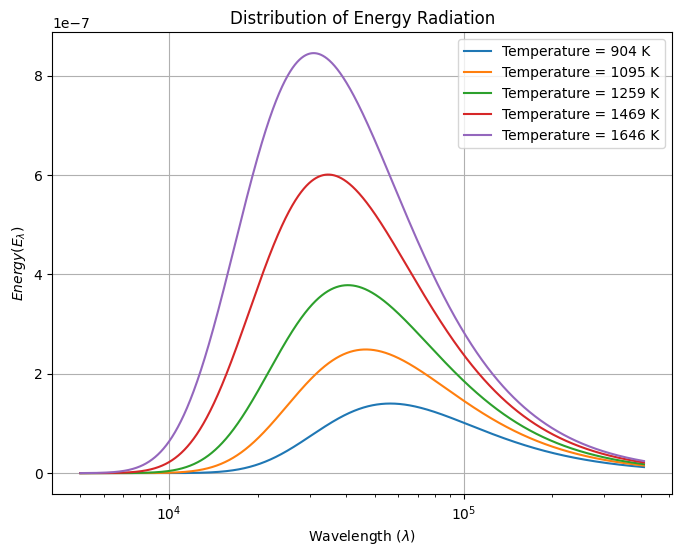

In [52]:
with quantity_support():
    plt.figure(figsize=(8,6))
    for i in range (temp.size):
        plt.semilogx(wav,flux[i],label="Temperature = %a K"%temp[i])
        
        plt.xlabel("Wavelength ($\lambda)$")
        plt.ylabel("$Energy(E_{\lambda})$")
        plt.title("Distribution of Energy Radiation")
        plt.legend(loc="upper right")
        plt.grid("science")

<font size=3>Hence, the curves between the intensity or energy and wavelength are plotted at different temperatures.</font>